<a href="https://colab.research.google.com/github/nkiru-ede/nkiru_codes/blob/master/Assessment_Big_Data_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 62 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u312-b07-0ubuntu1~18.04 [28.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jdk-headless amd64 8u312-b07-0ubuntu1~18.

In [ ]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2022-07-08 16:02:11--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  18.1MB/s    in 32s     

2022-07-08 16:02:43 (8.15 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



In [ ]:
!tar xf spark-3.2.1-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"


In [ ]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("DataCleaningApp")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark

In [ ]:
pip install gmplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 164 kB 6.8 MB/s 


In [ ]:
#importing essential libraries
import pyspark.sql
import datetime
from pyspark.sql.functions import *
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
import pyspark
import numpy as np
import pandas as pd
import pyspark.ml.feature
import pyspark.ml.classification 
import pyspark.ml.evaluation
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.classification import LinearSVC
from sklearn.metrics import confusion_matrix
from pyspark.ml.classification import NaiveBayes 
from geopy.geocoders import Nominatim
import numpy as np
import gmplot


In [ ]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting
import seaborn as sns
import os
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
import webbrowser

In [ ]:
#Load all datasets into spark
df_users = spark.read.csv("/content/users.csv", header=True, inferSchema=True)
df_userSession = spark.read.csv("/content/user-session.csv", header=True, inferSchema=True)
df_team = spark.read.csv("/content/team.csv", header=True, inferSchema=True)
df_teamAssignment = spark.read.csv("/content/team-assignments.csv", header=True, inferSchema=True)
df_levelEvents = spark.read.csv("/content/level-events.csv", header=True, inferSchema=True)
df_gameClicks = spark.read.csv("/content/game-clicks.csv", header=True, inferSchema=True)
df_buyClicks = spark.read.csv("/content/buy-clicks.csv", header=True, inferSchema=True)
df_adClicks = spark.read.csv("/content/ad-clicks.csv", header=True, inferSchema=True)

In [ ]:
#remove all rows with missing values
df_users = df_users.na.drop()
df_userSession = df_userSession.na.drop()
df_team = df_team.na.drop()
df_teamAssignment = df_teamAssignment.na.drop()
df_levelEvents = df_levelEvents.na.drop()
df_gameClicks = df_gameClicks.na.drop()
df_buyClicks = df_buyClicks.na.drop()
df_adClicks = df_adClicks.na.drop()

In [ ]:
#covert dob field to age
from pyspark.sql import functions as F
df_users = df_users.withColumn('age', (F.months_between(current_date(), F.col('dob')) / 12).cast('int'))
#drop DOB column
df_users = df_users.drop('dob')

In [ ]:
#show current dataset
df_users.show()

+-------------------+------+-----------+----------+-------+---+
|          timestamp|userId|       nick|   twitter|country|age|
+-------------------+------+-----------+----------+-------+---+
|2012-06-19 14:53:41|   442|   pcjIOBKW|  @SZhyOHv|     BA| 27|
|2012-06-19 19:29:01|   949|    vAOfUkf|    @nkkNo|     HU| 51|
|2012-06-20 19:34:59|  1654|     qOOXSQ|    @SwOlw|     IS| 52|
|2012-06-21 01:18:29|  1586|    px4gW51|  @IrCHTnE|     AM| 56|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc|   @VJj0Az|     CC| 27|
|2012-06-22 11:36:19|   952| BRbb3VOTti|   @b4OK6K|     MH| 35|
|2012-06-23 08:11:18|  1056|    fGCIAtI| @IgDsdWdU|     SM| 30|
|2012-06-23 10:54:19|    91|tpDfgi3S0N9|   @LvTHGO|     BZ| 44|
|2012-06-23 14:59:26|   809| LkNRpRW6Ez|@ROrRkXwdh|     PF| 70|
|2012-06-23 17:40:35|    75|     fNWewX|   @OXqLyv|     JO| 42|
|2012-06-23 17:57:05|  2224|   rvXvUU9J|  @YexGCPm|     GW| 25|
|2012-06-24 05:29:24|   361|    Pk8oT6o|    @9YksF|     CK| 41|
|2012-06-24 23:33:59|   584|TBRJ3YueQCa|

In [ ]:
#drop columns not needed from userSession.csv
df_userSession = df_userSession.drop('timestamp', 'userSessionId', 'assignmentId', 'sessionType', 'teamLevel')
#drop duplicates from userSession
df_userSession.dropDuplicates(['userId']).show()

+------+------+------------+
|userId|teamId|platformType|
+------+------+------------+
|     0|   157|      iphone|
|     1|    99|     android|
|     2|    22|      iphone|
|     6|    77|      iphone|
|     8|   124|      iphone|
|     9|    97|      iphone|
|    10|   131|       linux|
|    12|    66|      iphone|
|    13|    78|     android|
|    14|   104|       linux|
|    15|    74|     windows|
|    16|   113|     android|
|    17|    97|     android|
|    20|   120|      iphone|
|    21|     9|     android|
|    23|   103|     android|
|    25|    75|         mac|
|    26|   173|     windows|
|    27|    70|         mac|
|    28|    64|      iphone|
+------+------+------------+
only showing top 20 rows



In [ ]:
#join users.csv with userSession.csv
df_new = df_users.join(df_userSession,["userId"])

In [ ]:
df_team.show(2)

+------+--------+-------------------+-------------------+--------------+------------+
|teamId|    name|   teamCreationTime|        teamEndTime|      strength|currentLevel|
+------+--------+-------------------+-------------------+--------------+------------+
|    79| O1uJX7C|2016-06-12 15:33:27|9999-12-31 23:59:59|0.774473575316|           1|
|    92|WeLHp8HZ|2016-06-12 21:54:20|9999-12-31 23:59:59| 0.17192602642|           1|
+------+--------+-------------------+-------------------+--------------+------------+
only showing top 2 rows



In [ ]:
#add teamId and Strength to the new dataset
df_team = df_team.drop('name', 'teamCreationTime', 'teamEndTime', 'currentLevel')
df_teamP = df_team.toPandas()


In [ ]:
df_teamP

,teamId,strength
0,79,0.774474
1,92,0.171926
2,6,0.537353
3,7,0.394370
4,40,0.706833
...,...,...
104,143,0.060460
105,161,0.994851
106,165,0.073988
107,171,0.225849


In [ ]:
df_newP = df_new.toPandas()

In [ ]:
#add teamId and Strength to the new dataset
CurrentDF = pd.merge(df_newP, df_teamP, how='outer', suffixes=('', '_drop'))

In [ ]:
CurrentDF

,userId,timestamp,nick,twitter,country,age,teamId,platformType,strength
0,170.0,2016-02-13 15:04:42,HmV6dJIAjP,@ejgBLF,ST,48.0,90,iphone,0.443162
1,170.0,2016-02-13 15:04:42,HmV6dJIAjP,@ejgBLF,ST,48.0,90,iphone,0.443162
2,2333.0,2016-02-06 07:28:49,y8PT02Yo,@dGSZK,VN,25.0,90,android,0.443162
3,2333.0,2016-02-06 07:28:49,y8PT02Yo,@dGSZK,VN,25.0,90,android,0.443162
4,1972.0,2015-09-03 16:52:11,67IKDTjPvj,@fnIcW1,FM,40.0,90,mac,0.443162
...,...,...,...,...,...,...,...,...,...
9310,NaN,NaN,NaN,NaN,NaN,NaN,143,NaN,0.060460
9311,NaN,NaN,NaN,NaN,NaN,NaN,161,NaN,0.994851
9312,NaN,NaN,NaN,NaN,NaN,NaN,165,NaN,0.073988
9313,NaN,NaN,NaN,NaN,NaN,NaN,171,NaN,0.225849


In [ ]:
#combine the newest dataset with isHit and ClickID
df_game = pd.read_csv ('/content/game-clicks.csv')
df_game = df_game.rename(columns=lambda x: x.strip()) #removes whitespaces from headers if exists
df_game = df_game.groupby(['userId'],as_index=False).agg({'isHit':'sum', 'clickId':'count'})
DF_Combined = pd.merge(CurrentDF, df_game, how='outer', suffixes=('', '_drop'))

In [ ]:
#insert price and buyid from the buy-clicks file to DF-combined

df_buyClicks = pd.read_csv ('/content/buy-clicks.csv')
df_buyClicks = df_buyClicks.groupby(['userId'],as_index=False).agg({'price':'sum', 'buyId':'count'})

DF = pd.merge(DF_Combined, df_buyClicks, how='outer', suffixes=('', '_drop'))

In [ ]:
#combine the add clicks file
df_adClick = pd.read_csv ('/content/ad-clicks.csv')
df_adClick = df_adClick.groupby(['userId'],as_index=False).agg({'adId':'count'})

DF = pd.merge(DF, df_adClick, how='outer', suffixes=('', '_drop'))

In [ ]:
#Drop the duplicate columns
DF.drop([col for col in DF.columns if 'drop' in col], axis=1, inplace=True)

DF = DF[DF['userId'].notna()]

In [ ]:
#view new dataset
DF.head(2)

,userId,timestamp,nick,twitter,country,age,teamId,platformType,strength,isHit,clickId,price,buyId,adId
0,170.0,2016-02-13 15:04:42,HmV6dJIAjP,@ejgBLF,ST,48.0,90.0,iphone,0.443162,7.0,64.0,NaN,NaN,1.0
1,170.0,2016-02-13 15:04:42,HmV6dJIAjP,@ejgBLF,ST,48.0,90.0,iphone,0.443162,7.0,64.0,NaN,NaN,1.0


In [ ]:
#rename the final DF data columns
DF = DF.rename(columns={'price': 'total_purchases_amount',
                                                'clickId': 'game_clicks_count',
                                                'isHit': 'hit_count' ,
                                                'buyId': 'purchases_count',
                                                'adId': 'ad_clicks_count'
                                                })

In [ ]:
#insert the bought_items column and set it to 1, where purchases_count > 0 
DF['bought_items'] = np.where(DF['purchases_count'] >= 1, 1, 0)

In [ ]:
# delete redundant columns
del DF['nick']
del DF['twitter']

In [ ]:
# replace NA Values:

DF['platformType']=DF['platformType'].fillna('No Platform')
DF['country']=DF['country'].fillna('No country')
DF['teamId']=DF['teamId'].fillna(0)
DF['strength']=DF['strength'].fillna(0)
DF['total_purchases_amount']=DF['total_purchases_amount'].fillna(0)
DF['purchases_count']=DF['purchases_count'].fillna(0)
DF['hit_count']=DF['hit_count'].fillna(0)
DF['game_clicks_count']=DF['game_clicks_count'].fillna(0)
DF['ad_clicks_count']=DF['ad_clicks_count'].fillna(0)
DF['age']=DF['ad_clicks_count'].fillna(0)
DF['timestamp']=DF['timestamp'].fillna(0)

In [ ]:
# Changing data type from float to int for features that are Ids or counts features:
    
DF['teamId'] = DF['teamId'].astype('Int64')
DF['userId'] = DF['userId'].astype('Int64')
DF['purchases_count'] = DF['purchases_count'].astype('Int64')
DF['hit_count'] = DF['hit_count'].astype('Int64')
DF['game_clicks_count'] = DF['purchases_count'].astype('Int64')
DF['ad_clicks_count'] = DF['hit_count'].astype('Int64')
DF['age'] = DF['age'].astype('Int64')

In [ ]:
#show dataobjects
DF.isna().any()

userId                    False
timestamp                 False
country                   False
age                       False
teamId                    False
platformType              False
strength                  False
hit_count                 False
game_clicks_count         False
total_purchases_amount    False
purchases_count           False
ad_clicks_count           False
bought_items              False
dtype: bool

In [ ]:
#remove duplicate records
DF.duplicated(subset='userId').sum()
DF.shape

(9350, 13)

In [ ]:
#drop duplicates
DF = DF.drop_duplicates(['userId']).reset_index(drop=True)

In [ ]:
# remove instances of users who never interacted with the game at all
DF = DF.drop(DF[(DF['teamId'] == 0) & (DF['strength'] == 0) & (DF['game_clicks_count'] == 0) & (DF['purchases_count'] == 0)].index)
DF.shape      


(1108, 13)

In [ ]:
# Check if there is a bias in the bought_items feature:
DF.groupby('bought_items')['userId'].count()

bought_items
0    562
1    546
Name: userId, dtype: int64

In [ ]:
#show users hit counts
hitCount = DF["hit_count"].value_counts()
hitCount = pd.DataFrame(hitCount)
hitCount

,hit_count
47,15
16,15
51,14
38,14
57,14
...,...
192,1
240,1
227,1
189,1


In [ ]:
#showing the relationship between the platformType used by users to play the game
platformPlot = DF["platformType"].value_counts()
platformPlot = pd.DataFrame(platformPlot)
platformPlot

,platformType
iphone,444
android,391
windows,151
linux,55
mac,52
No Platform,15


[Text(0.5, 0, 'Activity Count')]

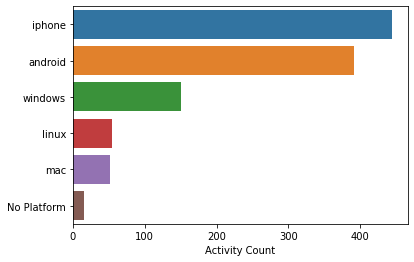

In [ ]:
#plot relationship between platform type 
sns.barplot(x="platformType", y =platformPlot.index, data = platformPlot).set(xlabel = "Activity Count")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


([<matplotlib.patches.Wedge at 0x7f86095bd250>,
 [Text(0.33754479689606026, 1.0469305182715793, 'iphone'),
  Text(-0.9732200293592761, -0.5126819427812236, 'android'),
  Text(0.4792782991203104, -0.9900971225048291, 'windows'),
  Text(0.9457985824861405, -0.5616627469996631, 'linux'),
  Text(1.0704026189485414, -0.25345262545119507, 'mac'),
  Text(1.0990052831217925, -0.04676951646520501, 'No Platform')])

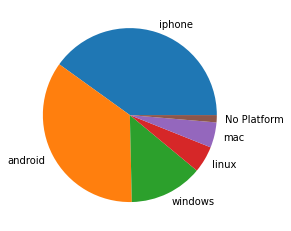

In [ ]:
#pie plot of platform type count
colors = sns.color_palette("tab10")
plt.pie(platformPlot, labels = platformPlot.index, colors = colors)


In [ ]:
#show new dataframe
DF

,userId,timestamp,country,age,teamId,platformType,strength,hit_count,game_clicks_count,total_purchases_amount,purchases_count,ad_clicks_count,bought_items
0,170,2016-02-13 15:04:42,ST,1,90,iphone,0.443162,7,0,0.0,0,7,0
1,2333,2016-02-06 07:28:49,VN,0,90,android,0.443162,238,0,0.0,0,238,0
2,1972,2015-09-03 16:52:11,FM,53,90,mac,0.443162,243,9,61.0,9,243,1
3,1639,2013-07-15 20:54:18,KY,45,90,iphone,0.443162,233,10,155.0,10,233,1
4,228,2014-01-22 15:43:06,BE,0,90,android,0.443162,73,0,0.0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,1257,0,No country,4,0,No Platform,0.000000,3,1,10.0,1,3,1
1166,1873,0,No country,1,0,No Platform,0.000000,1,1,3.0,1,1,1
1171,1960,0,No country,3,0,No Platform,0.000000,6,1,5.0,1,6,1
1177,2035,0,No country,5,0,No Platform,0.000000,2,2,40.0,2,2,1


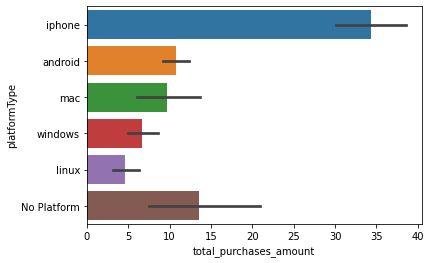

In [ ]:
#plot the relationship between total purchases amount and platform type
sns.barplot(x="total_purchases_amount",y="platformType",data=DF)

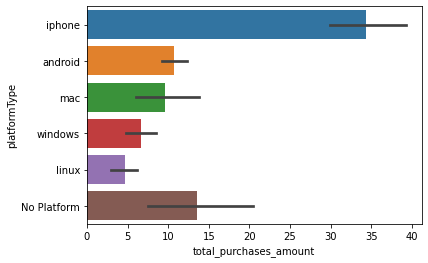

In [ ]:
sns.barplot(x="total_purchases_amount",y="platformType",data=DF)

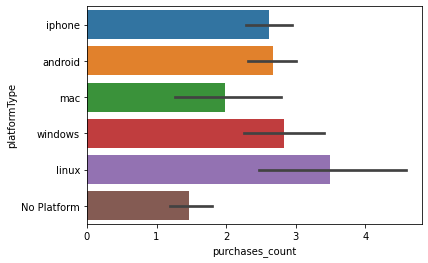

In [ ]:
#plot the relationship between purchases count and platform type

sns.barplot(x="purchases_count",y="platformType",data=DF)

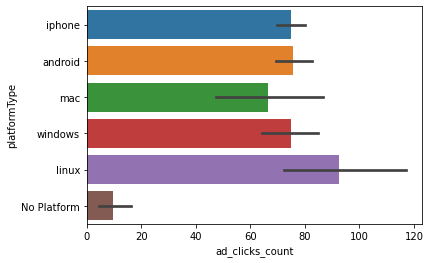

In [ ]:
#plot the relationship between ad clicks count and platformType
sns.barplot(x="ad_clicks_count",y="platformType",data=DF)

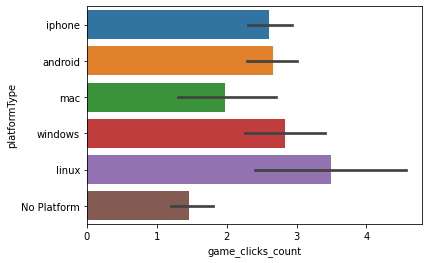

In [ ]:
#plot the relationship between game clicks count and platformType
sns.barplot(x="game_clicks_count",y="platformType",data=DF)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8608c83450>]],
      dtype=object)

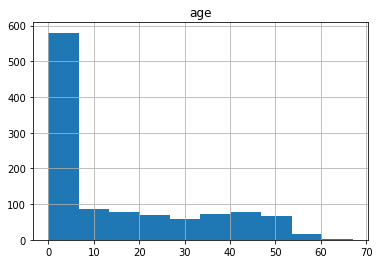

In [ ]:
#Histogram showing the age distribution
DF.hist(column='age', bins=10)

In [ ]:
# Check the users with highest hit counts
Hcount = DF.groupby('hit_count').sum()['userId'].sort_values(ascending=False)
Hcount

hit_count
36     21298
41     19812
31     17926
95     17686
16     17664
       ...  
388      229
180      161
115      150
177       26
260       16
Name: userId, Length: 227, dtype: Int64

,topUsers,topHits
0,436,517
1,2356,504
2,1418,497
3,911,419
4,1000,403


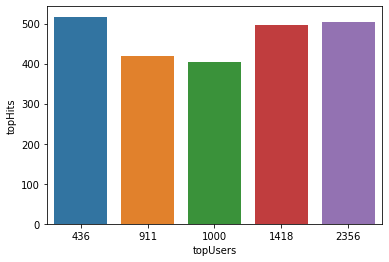

In [ ]:
#plote top users with highest hit counts
topUsers = [436,2356,1418,911,1000]
topHits = [517,504,497,419,403]
zipped = list(zip(topUsers, topHits))
hitDF = pd.DataFrame(zipped, columns = ['topUsers', 'topHits'])
sns.barplot(x="topUsers",y="topHits",data=hitDF)
hitDF

In [ ]:
#show the data summary
showSummary = DF.describe()
showSummary = showSummary.T
showSummary

,count,mean,std,min,25%,50%,75%,max
userId,1108.0,1194.847473,692.335420,0.0,590.75,1195.000,1782.2500,2389.000000
age,1108.0,14.661552,18.026380,0.0,0.00,4.000,30.0000,67.000000
teamId,1108.0,79.798736,44.888018,0.0,44.00,77.000,116.0000,179.000000
strength,1108.0,0.330160,0.337253,0.0,0.00,0.237,0.6115,0.952176
hit_count,1108.0,74.758123,65.613519,1.0,31.00,59.000,95.0000,517.000000
game_clicks_count,1108.0,2.659747,3.533901,0.0,0.00,0.000,5.0000,16.000000
total_purchases_amount,1108.0,19.320397,34.905748,0.0,0.00,0.000,25.0000,223.000000
purchases_count,1108.0,2.659747,3.533901,0.0,0.00,0.000,5.0000,16.000000
ad_clicks_count,1108.0,74.758123,65.613519,1.0,31.00,59.000,95.0000,517.000000
bought_items,1108.0,0.492780,0.500174,0.0,0.00,0.000,1.0000,1.000000


In [ ]:
plat_group = DF.groupby ('platformType').mean()
plat_group

,userId,age,teamId,strength,hit_count,game_clicks_count,total_purchases_amount,purchases_count,ad_clicks_count,bought_items
platformType,,,,,,,,,,
No Platform,1055.0,3.133333,0.0,0.000000,9.466667,1.466667,13.600000,1.466667,9.466667,1.000000
android,1215.826087,14.757033,82.117647,0.338865,75.749361,2.667519,10.772379,2.667519,75.749361,0.470588
iphone,1189.968468,14.768018,78.849099,0.346807,74.849099,2.61036,34.306306,2.61036,74.849099,0.486486
linux,1189.909091,18.4,84.854545,0.275721,92.545455,3.490909,4.636364,3.490909,92.545455,0.563636
mac,1165.980769,10.538462,85.519231,0.354300,66.538462,1.980769,9.634615,1.980769,66.538462,0.480769
windows,1180.503311,15.304636,80.701987,0.302983,74.761589,2.834437,6.642384,2.834437,74.761589,0.496689


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8608bae850>]],
      dtype=object)

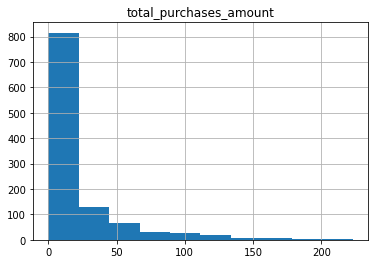

In [ ]:
# Histogram of bought items by Users
DF.hist(column='total_purchases_amount', bins=10)

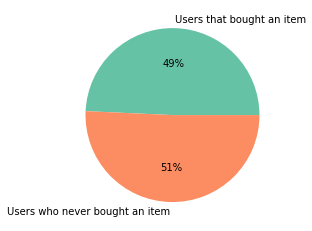

In [ ]:
# Pie CHart shows Overall counts of users who bought items vs. those who never bought.

bought=0
didnt=0
for index, row in DF.iterrows():    
    
    if row["bought_items"]>0:
       bought = bought +1    
    else:
       didnt = didnt + 1
labels = 'Users that bought an item', 'Users who never bought an item'

sizes = [bought, didnt]
colors = sns.color_palette("Set2")[0:10]
plt.pie(sizes, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
# Top teams with highest members
    
teams = DF.copy()
teams = teams[['teamId','userId']]
teams = teams[teams['teamId'].notna()]
teams = teams.groupby('teamId')['userId'].count().to_frame().reset_index()
teams = teams.rename(columns = {'userId':'users_count'})

# Drop instances from this data frame if team id = 0 which means the user has no team.
teams = teams[teams.teamId != 0]
teams["Percentage"] = 100*(teams["users_count"]/teams['users_count'].sum())
teams.sort_values(by='users_count', ascending=False, inplace=True)
teams=teams.reset_index(drop=True)
teams = teams.head(5)


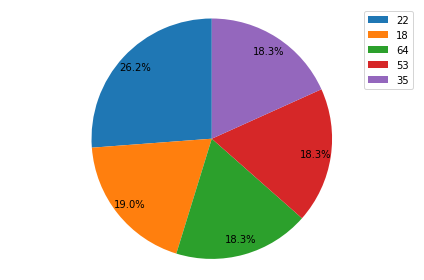

In [ ]:
# Pie Chart for top 3 teams with most users count
colors = sns.color_palette('bright')[0:5]
plt.pie(teams["users_count"],autopct='%1.1f%%', startangle=90, pctdistance=0.87,labels=None)
plt.legend(labels=teams["teamId"], loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
#Used Platforms:
   
devices_list = DF['platformType'].tolist()

#iterate over all hashtags so they can be split where there is more than one hashtag per row
devices = []
for item in devices_list:
    #item = item.split()
    #for i in item:
    devices.append(item)


In [ ]:
# Use the Built-in Python Collections module to determine Unique count of all hashtags used
from collections import Counter
source_counts = Counter(devices)
df_devices = pd.DataFrame.from_dict(source_counts, orient='index').reset_index()
df_devices.columns = ['devices', 'devices_counts']
df_devices.sort_values(by='devices_counts', ascending=False, inplace=True)
df_devices=df_devices.reset_index(drop=True)
print (f'Total Number of Unique devices is: {df_devices.shape[0]}.')

df_devices["Percentage"] = 100*(df_devices["devices_counts"]/df_devices['devices_counts'].sum())
df_devices = df_devices.head(6)

Total Number of Unique devices is: 6.


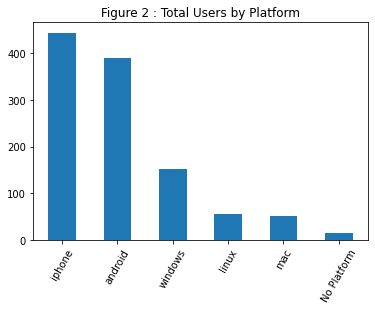

In [ ]:
# Bar Chart for top 5 tweet sources
plt.bar(df_devices["devices"], df_devices["devices_counts"],width=0.5) 
plt.title('Figure 2 : Total Users by Platform' ) 
plt.xticks(rotation=60)
plt.show()
    

In [ ]:
#Get Top 10 users
TopUsers = DF.copy()
TopUsers = TopUsers[['userId','total_purchases_amount']]
TopUsers = TopUsers[TopUsers['userId'].notna()]
TopUsers = TopUsers.groupby('userId')['total_purchases_amount'].sum().to_frame().reset_index()
TopUsers = TopUsers.rename(columns = {'total_purchases_amount':'Total_Amount'})

In [ ]:
#show top users
TopUsers

,userId,Total_Amount
0,0,0.0
1,1,21.0
2,2,0.0
3,6,0.0
4,8,53.0
...,...,...
1103,2383,18.0
1104,2384,36.0
1105,2386,3.0
1106,2387,45.0


In [ ]:
# remove instances where users have no team
TopUsers = TopUsers[TopUsers.userId != 0]
TopUsers["Percentage"] = 100*(TopUsers["Total_Amount"]/TopUsers['Total_Amount'].sum())
TopUsers.sort_values(by='Total_Amount', ascending=False, inplace=True)
TopUsers=TopUsers.reset_index(drop=True)
TopUsers = TopUsers.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# Users' Countries

#function to get longitude and latitude data from country name
geolocator = Nominatim(user_agent="http")

# Go through all tweets and add locations to 'coordinates' dictionary
coordinates = {'latitude': [], 'longitude': []}
for count, user_loc in enumerate(DF['country']):
    try:
        location = geolocator.geocode(user_loc)
        
        # If coordinates are found for location
        if location:
            coordinates['latitude'].append(location.latitude)
            coordinates['longitude'].append(location.longitude)
            
    # If too many connection requests
    except:
        pass
    
df_geolocation = pd.DataFrame.from_dict(coordinates,orient='index').transpose()

In [ ]:
#remove invalid rows
Location_test = [x for x in df_geolocation if str(x) != 'nan']
#add headers to new dataframe
df_geolocation = pd.DataFrame(df_geolocation, columns=["latitude", 'longitude'])
df_geolocation = df_geolocation.dropna()
Lat = df_geolocation['latitude']
Long = df_geolocation['longitude']
map_plot = gmplot.GoogleMapPlotter(53.81604806664296, -3.0548307614209813, 3)
map_plot.heatmap(Lat, Long)
#draw map and save html file
map_plot.draw("test.html")
#open new webbrower to display map
webbrowser.open_new_tab("test.html")

False

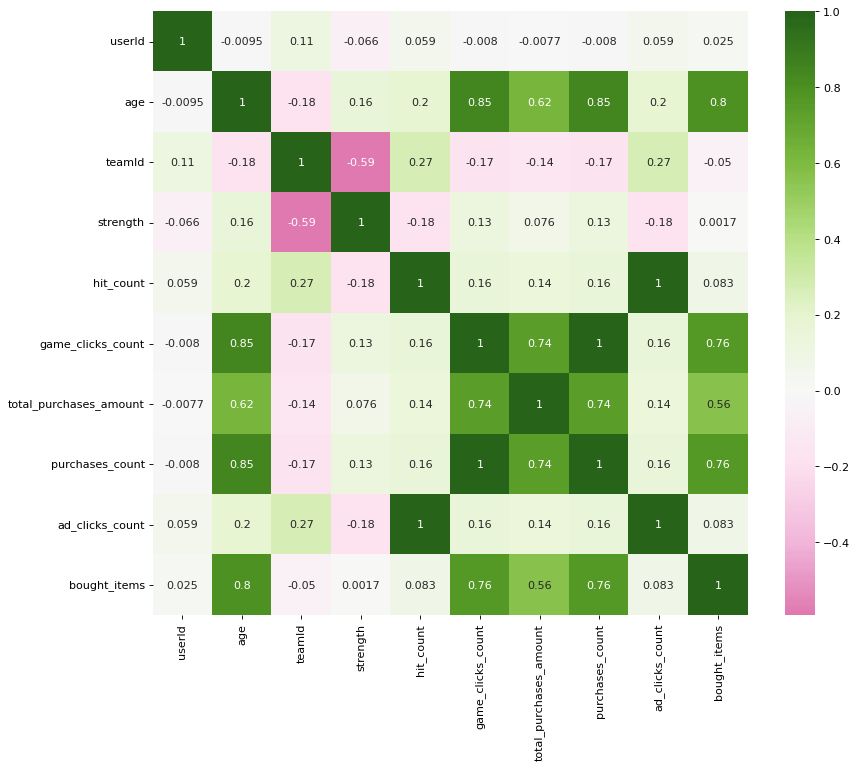

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(DF.corr(), xticklabels=DF.corr().columns, yticklabels=DF.corr().columns, cmap='PiYG', center=0, annot=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
#classification
#drop columns not needed for classification
DF.drop(['platformType', 'country', 'userId','timestamp'], axis=1, inplace=True)

In [ ]:
#convert pandas dataframe to spark
DF = spark.createDataFrame(DF)

In [ ]:
DF = DF.withColumnRenamed("bought_items", "label")

In [ ]:
#consolidate all of the predictor columns into a single column
# Create an assembler object
assembler = VectorAssembler(inputCols=[
    'age','teamId','strength', 'hit_count',
    'game_clicks_count', 
    'total_purchases_amount',
    'purchases_count', 'ad_clicks_count'
], outputCol='features')

# Consolidate predictor columns
df_assembled = assembler.transform(DF)

# Check the resulting column
df_assembled.show(5, truncate=False)

+---+------+--------------+---------+-----------------+----------------------+---------------+---------------+-----+------------------------------------------------------+
|age|teamId|strength      |hit_count|game_clicks_count|total_purchases_amount|purchases_count|ad_clicks_count|label|features                                              |
+---+------+--------------+---------+-----------------+----------------------+---------------+---------------+-----+------------------------------------------------------+
|1  |90    |0.443162418548|7        |0                |0.0                   |0              |7              |0    |[1.0,90.0,0.443162418548,7.0,0.0,0.0,0.0,7.0]         |
|0  |90    |0.443162418548|238      |0                |0.0                   |0              |238            |0    |(8,[1,2,3,7],[90.0,0.443162418548,238.0,238.0])       |
|53 |90    |0.443162418548|243      |9                |61.0                  |9              |243            |1    |[53.0,90.0,0.44316241854

In [ ]:
train, test = df_assembled.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 784
Test Dataset Count: 324


In [ ]:
nb = NaiveBayes(modelType="multinomial")

In [ ]:
nbmodel = nb.fit(train)
predictions_df = nbmodel.transform(test)
predictions_df.show(5, True)

+---+------+--------------+---------+-----------------+----------------------+---------------+---------------+-----+--------------------+--------------------+--------------------+----------+
|age|teamId|      strength|hit_count|game_clicks_count|total_purchases_amount|purchases_count|ad_clicks_count|label|            features|       rawPrediction|         probability|prediction|
+---+------+--------------+---------+-----------------+----------------------+---------------+---------------+-----+--------------------+--------------------+--------------------+----------+
|  0|     0|           0.0|        1|                1|                  10.0|              1|              1|    1|[0.0,0.0,0.0,1.0,...|[-139.83803825517...|[2.74420210715858...|       1.0|
|  0|     2|0.146636553695|       99|                0|                   0.0|              0|             99|    0|(8,[1,2,3,7],[2.0...|[-233.49317801012...|[1.0,8.8546717603...|       0.0|
|  0|     8|0.908268818406|       12|        

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy") 
nbaccuracy = evaluator.evaluate(predictions_df) 
print("Test accuracy = " + str(nbaccuracy))

Test accuracy = 0.9876543209876543


In [ ]:
#clustering
from itertools import cycle, islice
from math import sqrt
from numpy import array
from pandas.plotting import parallel_coordinates
from pyspark.ml.clustering import KMeans as KM
from pyspark.mllib.linalg import DenseVector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def computeCost(featuresAndPrediction, model):
    allClusterCenters = [DenseVector(c) for c in model.clusterCenters()]
    arrayCollection   = featuresAndPrediction.rdd.map(array)

    def error(point, predictedCluster):
        center = allClusterCenters[predictedCluster]
        z      = point - center
        return sqrt((z*z).sum())
    
    return arrayCollection.map(lambda row: error(row[0], row[1])).reduce(lambda x, y: x + y)


def elbow(elbowset, clusters):
	wsseList = []	
	for k in clusters:
		print("Training for cluster size {} ".format(k))
		kmeans = KM(k = k, seed = 1)
		model = kmeans.fit(elbowset)
		transformed = model.transform(elbowset)
		featuresAndPrediction = transformed.select("features", "prediction")

		W = computeCost(featuresAndPrediction, model)
		print("......................WSSE = {} ".format(W))

		wsseList.append(W)
	return wsseList

def elbow_plot(wsseList, clusters):
	wsseDF = pd.DataFrame({'WSSE' : wsseList, 'k' : clusters })
	wsseDF.plot(y='WSSE', x='k', figsize=(15,10), grid=True, marker='o')

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

def parallel_plot(data, P):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(P)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [ ]:
#Clustering
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
featuresUsed = ['age','teamId','strength', 'hit_count',
    'game_clicks_count', 
    'total_purchases_amount',
    'purchases_count', 'ad_clicks_count']
assembler = VectorAssembler(inputCols=featuresUsed, outputCol="features_unscaled")
assembled = assembler.transform(DF)

In [ ]:
scaler = StandardScaler(inputCol="features_unscaled", outputCol="features", withStd=True, withMean=True)
scalerModel = scaler.fit(assembled)
scaledData = scalerModel.transform(assembled)

In [ ]:
scaledData = scaledData.select("features", "label")

elbowset = scaledData.filter((scaledData.label % 3) == 0).select("features")
elbowset.persist()

DataFrame[features: vector]

In [ ]:
clusters = range(2,31)

wsseList = elbow(elbowset, clusters)

Training for cluster size 2 
......................WSSE = 741.4889848025784 
Training for cluster size 3 
......................WSSE = 673.3852745704719 
Training for cluster size 4 
......................WSSE = 563.6388529507342 
Training for cluster size 5 
......................WSSE = 509.34972250261455 
Training for cluster size 6 
......................WSSE = 483.90423202101596 
Training for cluster size 7 
......................WSSE = 447.6186047857428 
Training for cluster size 8 
......................WSSE = 442.7244945627229 
Training for cluster size 9 
......................WSSE = 397.4934102040629 
Training for cluster size 10 
......................WSSE = 381.83291503087537 
Training for cluster size 11 
......................WSSE = 371.8173042340957 
Training for cluster size 12 
......................WSSE = 344.0233829262308 
Training for cluster size 13 
......................WSSE = 336.98943956999733 
Training for cluster size 14 
......................WSSE = 337.94649

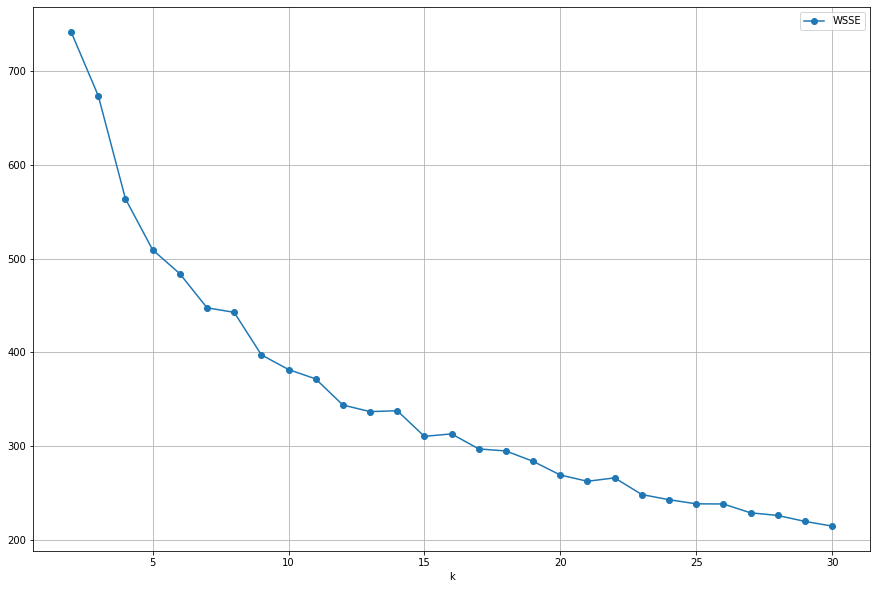

In [ ]:
elbow_plot(wsseList, clusters)

In [ ]:
#GRAPH ANALYSIS

#BELOW LINES OF CODES SHOULD BE RUN IN neo4j

#Set the constraints

CREATE CONSTRAINT ON (u:User) ASSERT u.id IS UNIQUE; 
CREATE CONSTRAINT ON (t:Team) ASSERT t.id IS UNIQUE; 
CREATE CONSTRAINT ON (c:TeamChatSession) ASSERT c.id IS UNIQUE; 
CREATE CONSTRAINT ON (i:ChatItem) ASSERT i.id IS UNIQUE; 


#Load the dataset into neo4j

#Create Team dataset

LOAD CSV with headers FROM "https://drive.google.com/uc?export=download&id=1l-wWSIc2GUAfiUP36a0olS0mtJhYg0LU" AS row 
MERGE (u:User {id: row.user_id})
MERGE (t:Team {id: row.team_id})
MERGE (c:TeamChatSession {id: row.assignmentId})
MERGE (u)-[:CreatesSession{timeStamp: row.date}]->(c)
MERGE (c)-[:OwnedBy{timeStamp: row.date}]->(t)


#Join chat dataset

LOAD CSV with headers FROM "https://drive.google.com/uc?export=download&id=1zIfm80OGQvsksCcPqD1zBs94m9NgFGd9" AS row
MERGE (u:User {id: row.user_id}) 
MERGE (c:TeamChatSession {id: row.assignmentId}) 
MERGE (u)-[:Join{timeStamp: row.date}]->(c)

#Leave chat dataset

LOAD CSV with headers FROM "https://drive.google.com/uc?export=download&id=1JA3EHBabiHz_LwHmB2bS4Z2cLCemKCsb" AS row 
MERGE (u:User {id: row.user_id}) 
MERGE (c:TeamChatSession {id: row.assignmentId}) 
MERGE (u)-[:Leaves{timeStamp: row.date}]->(c)


#Chat item dataset
LOAD CSV with headers FROM "https://drive.google.com/uc?export=download&id=1uOONrvPDLMkPKrq_HZwIksOmimeOCWU3" AS row 
MERGE (u:User {id: row.user_id}) 
MERGE (c:TeamChatSession {id: row.click_id}) 
MERGE (i:ChatItem {id: row.tx_id}) 
MERGE (u)-[:CreateChat{timeStamp: row.date}]->(i) 
MERGE (i)-[:PartOf{timeStamp: row.date}]->(c)

#mentions dataset
LOAD CSV with headers FROM "https://drive.google.com/uc?export=download&id=1SaRYi2XikyRDVuzgTZ-JlWVnSz2Yv3WB" AS row 
MERGE (i:ChatItem {id: row.tx_id}) 
MERGE (u:User {id: row.user_id}) 
MERGE (i)-[:Mentioned{timeStamp: row.date}]->(u)

#response dataset
LOAD CSV with headers FROM "https://drive.google.com/uc?export=download&id=1NX-VCREo62vlInWCkXr0q9_mzJHmBWzv" AS row 
MERGE (i:ChatItem {id: row.assignmentId}) 
MERGE (j:ChatItem {id: row.tx_id}) 
MERGE (i)-[:ResponseTo{timeStamp: row.date}]->(j)


#comparing the chat activities of two teams - Team 177 and Team 188

MATCH gh=(u:User)- [:CreateChat] - (i:ChatItem) - [:ResponseTo] -(i2:ChatItem) - [:PartOf] - (c:TeamChatSession) - [:OwnedBy] -> (t) 
RETURN gh LIMIT 200

MATCH gh=(u:User)- [:CreateChat] - (i:ChatItem) - [:ResponseTo] -(i2:ChatItem) - [:PartOf] - (c:TeamChatSession) - [:OwnedBy] -> (t) 
RETURN gh LIMIT 500

#Relationship between Teams and Team chat sessions
MATCH gh=()-[r:OwnedBy]->() RETURN gh LIMIT 2000

#Show user interactions - mentions, chat items and response
match gh = (p:User) - [:Mentioned] - (a:ChatItem) - [:ResponseTo] -() return gh limit 100

#User joins or leaves
match gh = (p:User) - [:Join] - (q:TeamChatSession) - [:Leaves] -()
return gh limit 100

In [ ]:
#How Do Developers Promote OSS?

#Read data
df_meetups = spark.read.csv("/content/meetup.csv", header=True, inferSchema=True)
df_OSS = spark.read.csv("/content/OSS.csv", header=True, inferSchema=True)

In [ ]:
#Join the two datasets

newDF= df_meetups.join(df_OSS,["Repository"])

In [ ]:
newDF.show()

In [ ]:
#convert to pandas dataframe
newDF = newDF.toPandas()

In [ ]:
newDF.dropna

In [ ]:
newDF

,Repository,Members,Interested,Meetups,Cities,Countries,Stargazers,Language,Owner Type,URL,...,Events,HackerNewsPosts,HackerNewsPoints,ProductHunt,Twitter,Facebook,Google+,UsersMeeting,Newsletter,RSSFeed
0,freeCodeCamp/freeCodeCamp,621.000,8.0,5.0,5.0,3.0,291172,JavaScript,Organization,https://github.com/freeCodeCamp/freeCodeCamp,...,No,104,1797,No,Active,Active,No,Yes,Yes,No
1,twbs/bootstrap,24505.000,1047.0,41.0,39.0,21.0,116617,JavaScript,Organization,https://github.com/twbs/bootstrap,...,No,15,1222,No,Active,Inactive,No,Yes,No,No
2,facebook/react,49504.000,1149.0,157.0,110.0,40.0,78667,JavaScript,Organization,https://github.com/facebook/react,...,Yes,23,332,No,Active,Inactive,No,Yes,Yes,Yes
3,tensorflow/tensorflow,98431.000,607.0,123.0,82.0,37.0,73305,C++,Organization,https://github.com/tensorflow/tensorflow,...,Yes,46,1554,2374,Active,No,No,Yes,Yes,Yes
4,vuejs/vue,31034.000,402.0,95.0,71.0,31.0,70582,JavaScript,Organization,https://github.com/vuejs/vue,...,Yes,16,1310,No,Active,No,No,Yes,Yes,Yes
5,d3/d3,52500.000,1056.0,69.0,58.0,27.0,69145,JavaScript,Organization,https://github.com/d3/d3,...,Yes,0,0,No,No,No,No,Yes,Yes,No
6,angular/angular.js,484699.000,18280.0,799.0,379.0,68.0,57301,JavaScript,Organization,https://github.com/angular/angular.js,...,Yes,10,57,No,Active,No,No,Yes,Yes,No
7,facebook/react-native,162649.000,2470.0,314.0,189.0,52.0,54669,JavaScript,Organization,https://github.com/facebook/react-native,...,Yes,19,707,651,Active,Active,No,Yes,Yes,Yes
8,electron/electron,NaN,NaN,NaN,NaN,NaN,51496,C++,Organization,https://github.com/electron/electron,...,Yes,11,263,1841,Active,No,No,Yes,No,Yes
9,torvalds/linux,1013321.000,106036.0,2261.0,725.0,96.0,50800,C,User,https://github.com/torvalds/linux,...,Yes,40,1116,No,No,No,No,Yes,No,Yes


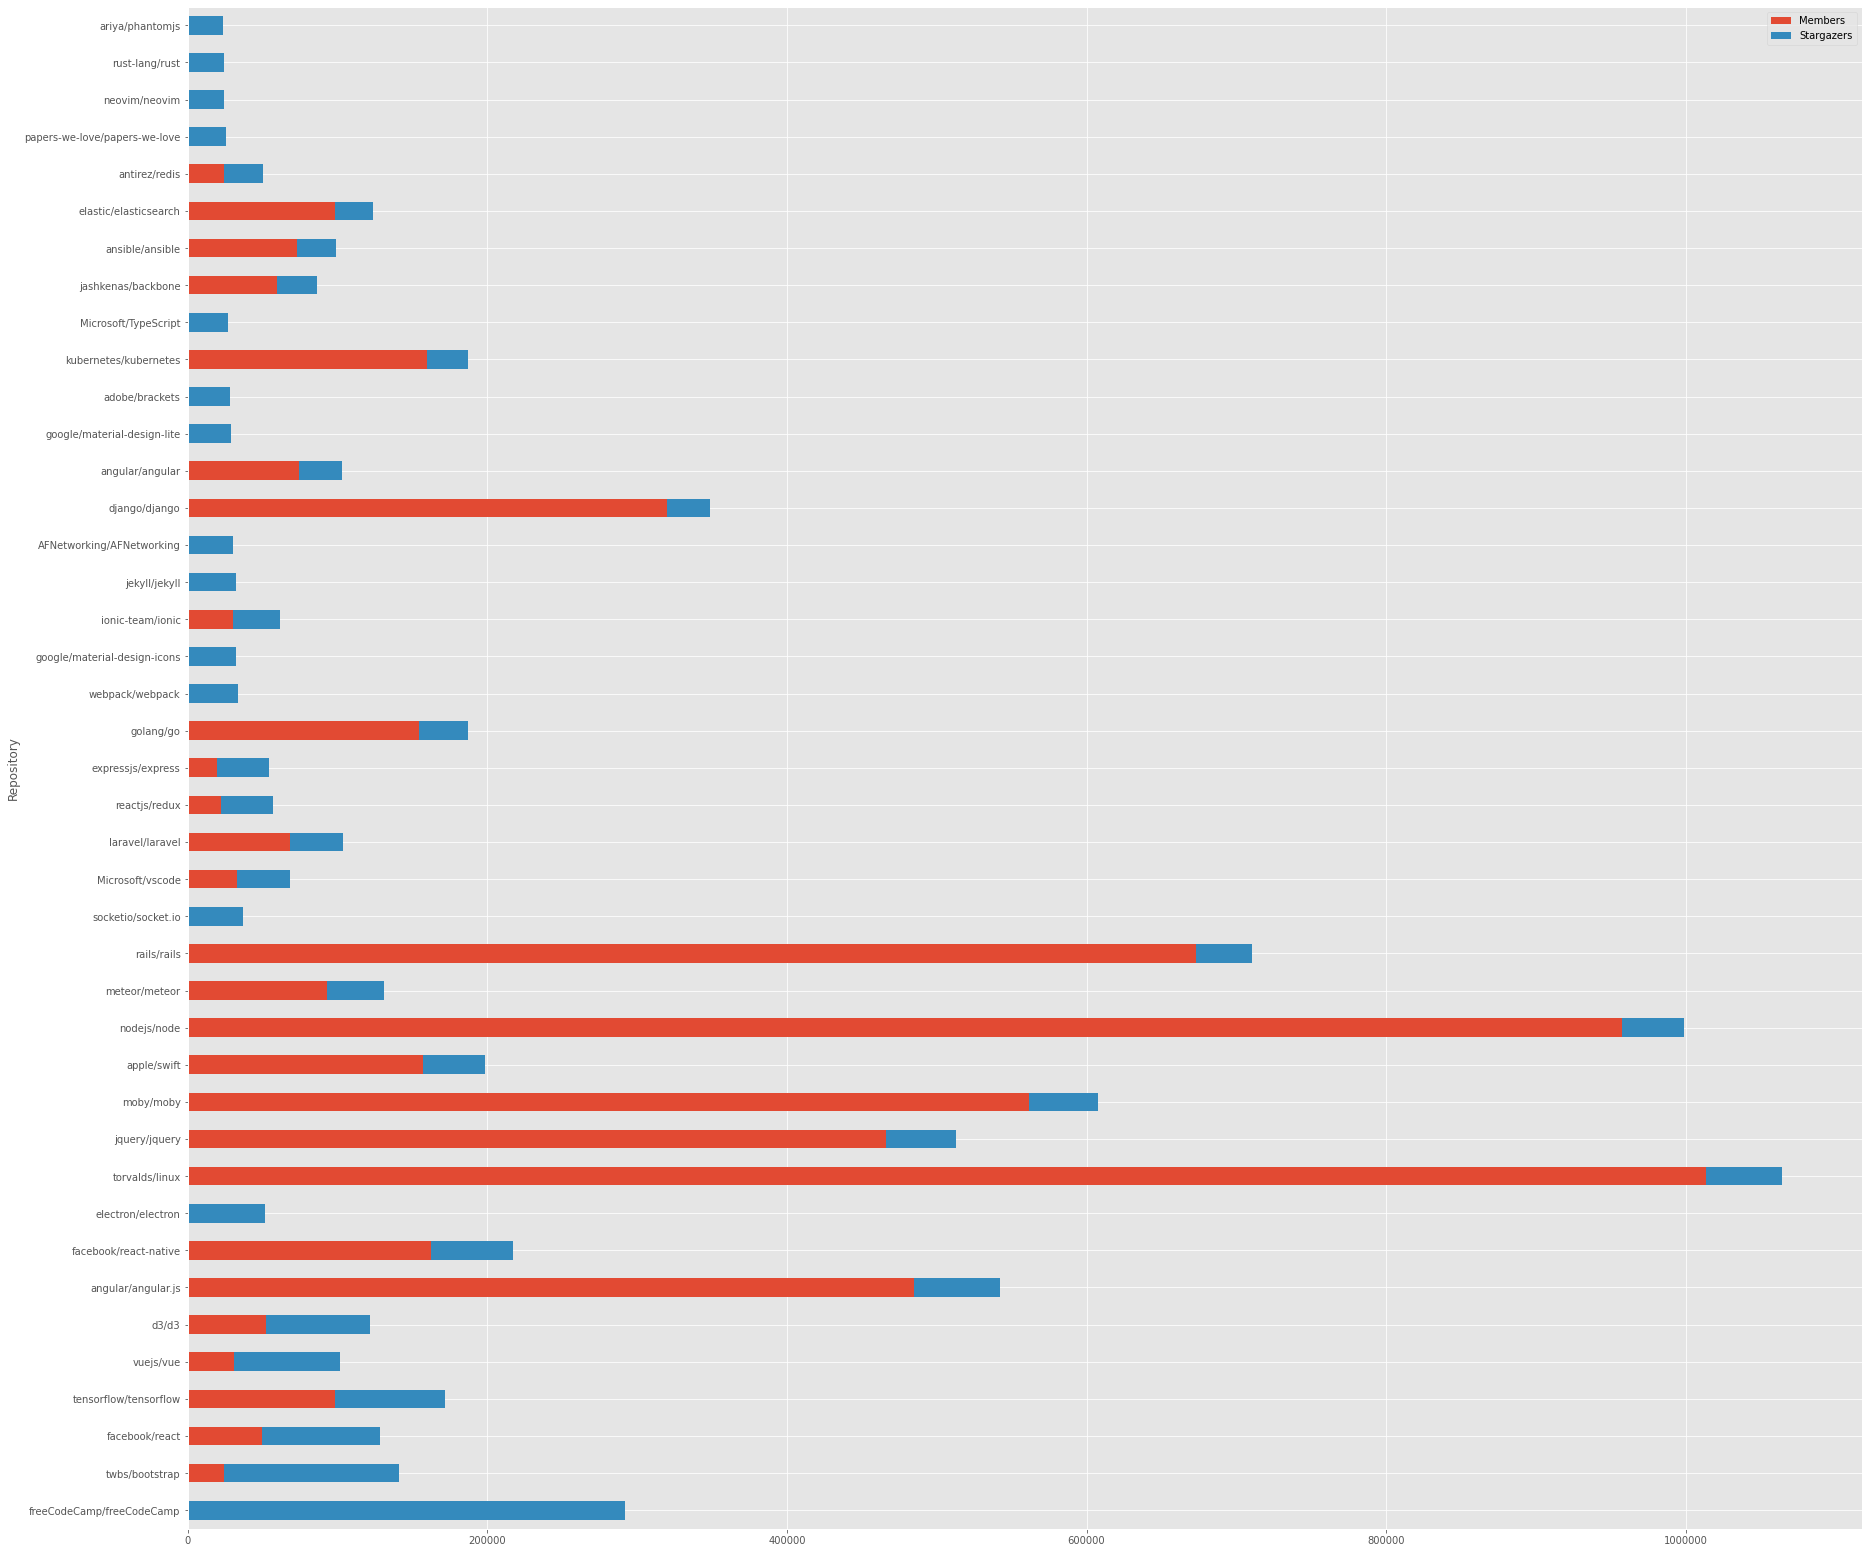

In [ ]:

newDF.plot.barh(x="Repository", y=["Members", "Stargazers"],figsize=(30,28), stacked=True)

plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
